In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

reduced_lam = np.linspace(-2.5, 7.5, 16) #lambda range around the critical point (m^2 = -4 is fixed)

plt.rcParams.update({'font.size': 35, 'axes.spines.right': False, 'axes.spines.top': False, 'lines.markersize': 17})
tab_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

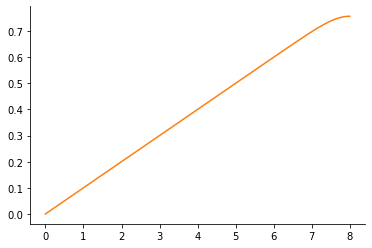

In [10]:
def V0(n, z):
    return z[1] - np.log(np.cosh(z[0] * Lt * (Lx//2 - n)) / np.cosh(z[0] * Lt * Lx//2)) / Lt

Lt, Lx = 16, 16
params = [0.1, 0.05]
r = np.linspace(0, 8, 100)
plt.plot(r, V0(r, params), color = 'tab:orange')#, label = 'best fit ($\kappa = $' +str(np.round(params[0], 3))+')')

plt.show()


0     0.013055
1     0.013089
2     0.012330
3     0.012151
4     0.012048
5     0.012531
6     0.013569
7     0.013755
8     0.014025
9     0.014388
10    0.014409
11    0.014793
12    0.014641
13    0.014815
14    0.014409
15    0.014859
Name: ESS (with warmup), dtype: float64
0     0.009510
1     0.009620
2     0.009083
3     0.008647
4     0.008889
5     0.009120
6     0.009403
7     0.009579
8     0.009592
9     0.009747
10    0.009877
11    0.009862
12    0.009921
13    0.009995
14    0.009950
15    0.009980
Name: ESS (with warmup), dtype: float64
0     0.007310
1     0.006739
2     0.006793
3     0.006793
4     0.006545
5     0.006964
6     0.006803
7     0.007112
8     0.007062
9     0.007072
10    0.007215
11    0.007184
12    0.007205
13    0.007310
14    0.007310
15    0.007267
Name: ESS (with warmup), dtype: float64
0     0.000000
1     0.005362
2     0.002110
3     0.004255
4     0.005333
5     0.004843
6     0.005312
7     0.005195
8     0.005188
9     0.005413
10    0.00

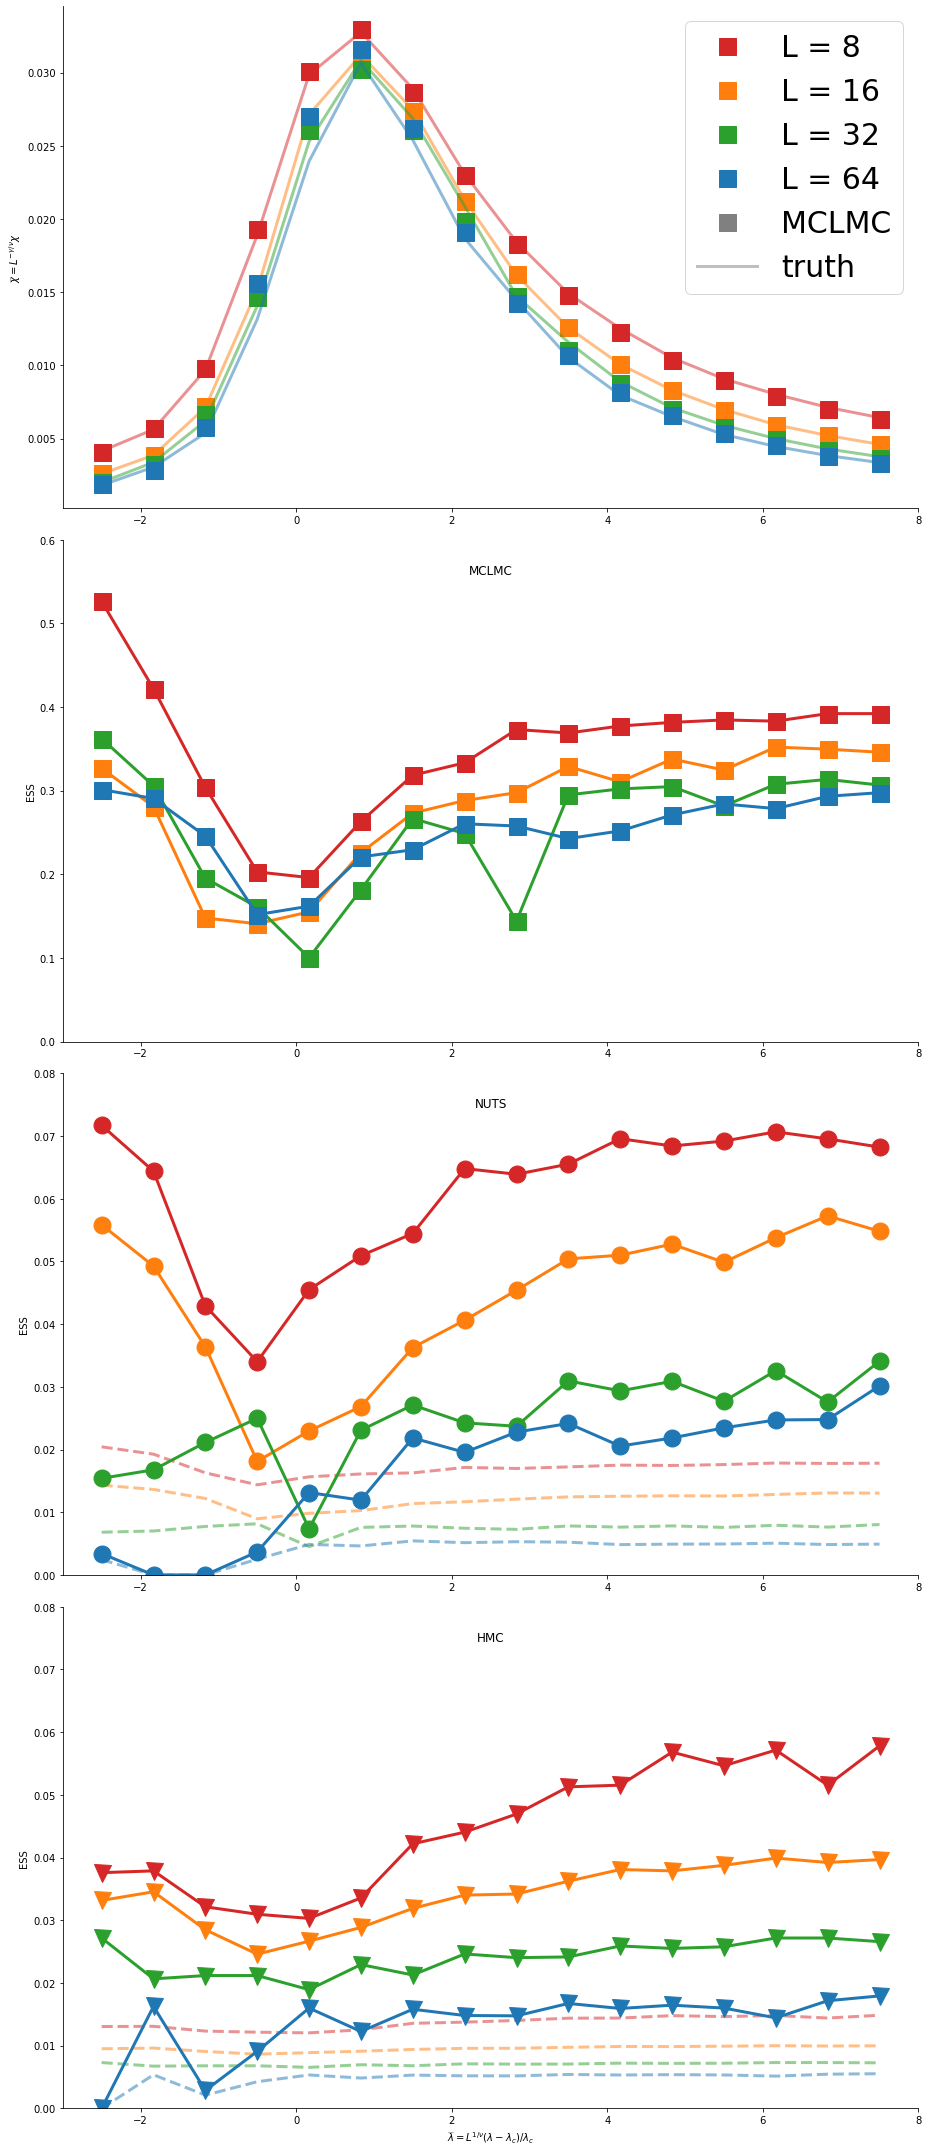

In [4]:
sides = [8, 16, 32, 64]
colors = ['tab:red', 'tab:orange',  'tab:green', 'tab:blue']

fig, (ax_chi, ax_mchmc, ax_nuts, ax_hmc) = plt.subplots(4, 1, figsize=(13, 30))

# susceptibility comparison with the ground truth 
for i in range(4):
    side = sides[i]
    
    # NUTS ground truth
    data = np.load('phi4results/nuts/ground_truth/chi/L'+str(side)+'.npy')
    ax_chi.plot(reduced_lam, np.median(data, 1), '-', lw = 3, color = colors[i], alpha = 0.5)
    
    # MCHMC
    data = np.load('phi4results/mchmc/ground_truth/chi/L'+str(side)+'.npy')
    ax_chi.plot(reduced_lam, np.median(data, 1), 's', lw = 3, color = colors[i], label= 'L = ' +str(side))

# labels    
ax_chi.plot([], [], 's', lw = 3, color = 'grey', label= 'MCLMC')
ax_chi.plot([], [], '-', lw = 3, color = 'grey', alpha = 0.5, label= 'truth')
    
ax_chi.set_ylabel(r'$\widebar{\chi} = L^{-\gamma/\nu} \chi$')
ax_chi.legend(loc = 1, fontsize= 30)


# Performance comparison
for i in range(len(sides)):
    side = sides[i]
    
    # MCHMC
    data_tf = pd.read_csv('phi4results/mchmc/ess/psd/autotune/L'+ str(side) + '.csv')
    #print(data_tf['ESS'])
    ax_mchmc.plot(reduced_lam, data_tf['ESS'], 's-', lw = 3, color= colors[i])

    # NUTS
    data_nuts = pd.read_csv('phi4results/nuts/ess/psd/L'+str(side)+'.csv')
    ax_nuts.plot(reduced_lam, data_nuts['ESS'], 'o-', lw = 3, color= colors[i])
    ax_nuts.plot(reduced_lam, data_nuts['ESS (with warmup)'], '--', lw = 3, alpha = 0.5, color= colors[i])

    # HMC
    data_hmc = pd.read_csv('phi4results/hmc/ess/psd/L'+str(side)+'.csv')
    print(data_hmc['ESS (with warmup)'])
    ax_hmc.plot(reduced_lam, data_hmc['ESS'], 'v-', lw = 3, color= colors[i])
    ax_hmc.plot(reduced_lam, data_hmc['ESS (with warmup)'], '--', lw = 3, alpha = 0.5, color= colors[i])
    

    
ax_mchmc.set_title("MCLMC", y = 0.92)
ax_mchmc.set_ylabel('ESS')
ax_mchmc.set_ylim(0, 0.6)

ax_nuts.set_title("NUTS", y = 0.92)
ax_nuts.set_ylabel('ESS')
ax_nuts.set_ylim(0, 0.08)

ax_hmc.set_title("HMC", y = 0.92)
ax_hmc.set_xlabel(r'$\widebar{\lambda} = L^{1/\nu}(\lambda - \lambda_c) / \lambda_c$')
ax_hmc.set_ylabel('ESS')
ax_hmc.set_ylim(0, 0.08)

plt.tight_layout()
#plt.savefig('phi4.pdf')
plt.show()

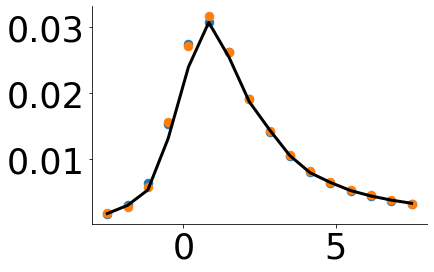

In [36]:
side = 64

data = np.load('phi4results/mchmc/ground_truth/chi/L'+str(side)+'.npy')
plt.plot(reduced_lam, np.median(data, 1), '.', color = 'tab:blue')

data = np.load('phi4results/mchmc/ground_truth/chi/LL'+str(side)+'.npy')
plt.plot(reduced_lam, np.median(data, 1), '.', color = 'tab:orange')

data = np.load('phi4results/nuts/ground_truth/chi/L'+str(side)+'.npy')
plt.plot(reduced_lam, np.median(data, 1), lw = 3, color = 'black')

plt.show()

In [ ]:
for side in [8, 16, 32]:
    data_tf = pd.read_csv('phi4results/mchmc/ess/psd/autotune/L'+ str(side) + '.csv')

    ess, L, eps = grid_results(side)

    plt.figure(figsize = (15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(reduced_lam, L/side, '-o', color = 'tab:blue')
    plt.plot(reduced_lam, data_tf['L']/side, '-o', color = 'tab:orange')
    plt.xlabel('reduced lam')
    plt.ylabel('alpha')

    plt.subplot(1, 2, 2)
    plt.plot(reduced_lam, eps/side, '-o', color = 'tab:blue')
    plt.plot(reduced_lam, data_tf['eps']/side, '-o', color = 'tab:orange')
    plt.xlabel('reduced lam')
    plt.ylabel('beta')

    plt.show()

In [ ]:
def grid_results(side):
    data = np.load('phi4results/mchmc/ess/psd/grid_search/L'+ str(side) + '.npy')
    data[np.isnan(data)] = 0.0
    index = np.array([np.argmax(dat) for dat in data], dtype=int)
    i1, i2 = np.divmod(index, 6)
    alpha = np.logspace(np.log10(0.4), np.log10(3.0), 6)
    beta = np.logspace(np.log10(0.2), np.log10(0.5), 6)
    return data[np.arange(16), i1, i2], alpha[i1] * side, beta[i2] * side

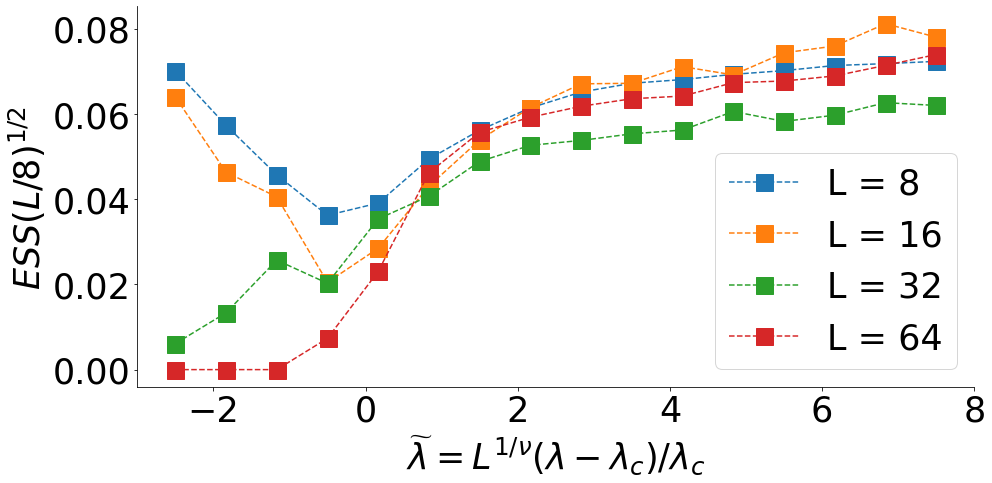

In [64]:
plt.figure(figsize = (15, 7))
for i in range(len(sides)):
    side = sides[i]
    data = pd.read_csv('phi4results/hmc/ess/psd/L'+str(side)+'.csv')
    plt.plot(reduced_lam, data['ESS'] * np.sqrt(2)**i, 's--', color=tab_colors[i], label = 'L = '+str(side))
        

plt.xlabel(r'$\bar{\lambda} = L^{1/\nu}(\lambda - \lambda_c) / \lambda_c$')
plt.ylabel(r'$ESS (L/8)^{1/2}$')

plt.legend()
plt.savefig('NUTS_dimension_scaling.pdf')
plt.show()